In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
from matplotlib.colors import ListedColormap
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from datetime import datetime, timedelta
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.seasonal import MSTL
import seaborn as sns
import matplotlib.pyplot as plt
from hmmlearn import hmm
from sklearn.metrics import f1_score, accuracy_score

In [2]:
data = pd.read_csv('../Dataframe/GameWithLabels.csv')

In [3]:
def frames_to_s(frame, start_frame=287, fps=30):
    seconds = (frame - start_frame) / fps
    return seconds

data['s'] = data['frame'].apply(frames_to_s)

In [4]:
def frames_to_timestamp(frame, start_frame=287, fps=30):
    seconds = (frame - start_frame) / fps
    timestamp = datetime(1, 1, 1) + pd.Timedelta(seconds=seconds)
    return timestamp.strftime('%H:%M:%S.%f')

data['timestamp'] = data['frame'].apply(frames_to_timestamp, args=(287, 30))

timestamp_format = '%H:%M:%S.%f'

data['timestamp'] = pd.to_datetime(data['timestamp'], format=timestamp_format)
data = data.set_index('timestamp')

In [5]:
data.sort_values(by = 'geschwindigkeit_p2', ascending= False)

,frame,new_x_Player1,new_x_Player2,new_y_Player1,new_y_Player2,new_z_Player1,new_z_Player2,vx_Player1,vx_Player2,xy_Player1,...,height_Player2,length_Player1,length_Player2,Status,Schlag Spieler 1,Schlag Spieler 2,Satz,geschwindigkeit_p1,geschwindigkeit_p2,s
timestamp,,,,,,,,,,,,,,,,,,,,,
1900-01-01 00:12:48.066666,23329,-0.812014,-3.264604,0.677791,4.565416,-3.962749,9.286928,-0.04030,3.81214,0.24004,...,1.12106,0.92053,0.88368,Aktiv,NaN,NaN,3.0,0.864924,32.571755,768.066667
1900-01-01 00:12:48.100000,23330,-0.807454,-3.155840,0.664111,4.367968,-3.991919,8.734826,-0.01671,3.10836,0.24012,...,1.12381,0.92657,0.88327,Aktiv,NaN,NaN,3.0,0.860337,27.763435,768.100000
1900-01-01 00:12:48.133333,23331,-0.802540,-3.158784,0.655775,4.291372,-4.007282,8.504711,-0.00059,2.07306,0.22816,...,1.11986,0.93167,0.89558,Aktiv,NaN,NaN,3.0,0.814327,22.529411,768.133333
1900-01-01 00:12:48.166666,23332,-0.797152,-3.203435,0.649734,4.260257,-4.019043,8.391001,0.01391,1.15587,0.21727,...,1.11211,0.93343,0.90569,Aktiv,NaN,NaN,3.0,0.772926,18.360929,768.166667
1900-01-01 00:11:39.466666,21271,-0.686716,2.996610,-1.445459,5.099267,-10.610810,12.920764,-0.20773,-1.28260,-0.25523,...,1.32765,0.63505,0.61020,Inaktiv,NaN,NaN,3.0,0.897247,15.927915,699.466667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1900-01-01 00:13:49.266666,25165,-0.643915,NaN,-1.319852,NaN,-10.163696,NaN,0.01505,NaN,-0.01490,...,NaN,0.59629,NaN,Inaktiv,NaN,NaN,3.0,0.057893,NaN,829.266667
1900-01-01 00:13:57.000000,25397,0.563602,NaN,0.725749,NaN,-3.248845,NaN,1.71706,NaN,-0.17554,...,NaN,1.01968,NaN,Aktiv,NaN,NaN,3.0,1.958593,NaN,837.000000
1900-01-01 00:13:57.033333,25398,0.627964,NaN,0.739151,NaN,-3.203744,NaN,1.74117,NaN,-0.18146,...,NaN,0.97926,NaN,Aktiv,NaN,NaN,3.0,1.992312,NaN,837.033333


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 23975 entries, 1900-01-01 00:00:00 to 1900-01-01 00:13:57.766666
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   frame               23975 non-null  int64  
 1   new_x_Player1       21944 non-null  float64
 2   new_x_Player2       18915 non-null  float64
 3   new_y_Player1       21944 non-null  float64
 4   new_y_Player2       18915 non-null  float64
 5   new_z_Player1       21944 non-null  float64
 6   new_z_Player2       18915 non-null  float64
 7   vx_Player1          21944 non-null  float64
 8   vx_Player2          18915 non-null  float64
 9   xy_Player1          21944 non-null  float64
 10  xy_Player2          18915 non-null  float64
 11  vz_Player1          21944 non-null  float64
 12  vz_Player2          18915 non-null  float64
 13  width_Player1       21944 non-null  float64
 14  width_Player2       18915 non-null  float64
 15  height_Play

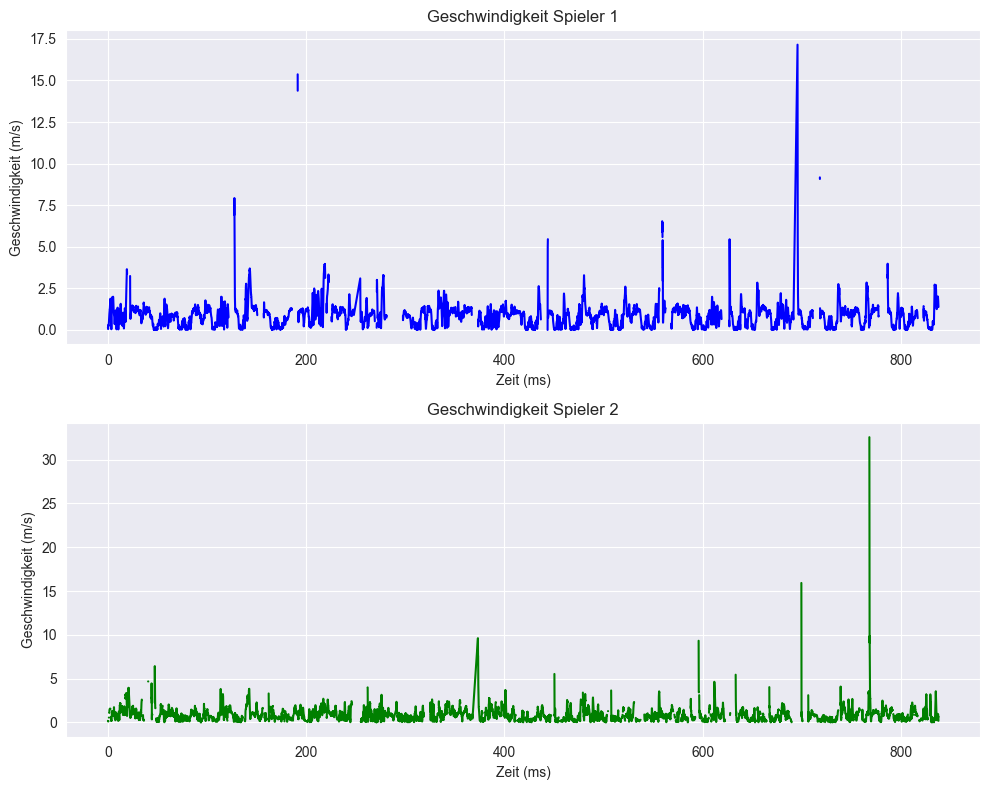

In [7]:
fig, axs = plt.subplots(2, 1, figsize=(10, 8))

# Zeichnen der Geschwindigkeit für Spieler 1 im ersten Subplot
axs[0].plot(data['s'], data['geschwindigkeit_p1'], color='blue')
axs[0].set_title('Geschwindigkeit Spieler 1')
axs[0].set_xlabel('Zeit (ms)')
axs[0].set_ylabel('Geschwindigkeit (m/s)')

# Zeichnen der Geschwindigkeit für Spieler 2 im zweiten Subplot
axs[1].plot(data['s'], data['geschwindigkeit_p2'], color='green')
axs[1].set_title('Geschwindigkeit Spieler 2')
axs[1].set_xlabel('Zeit (ms)')
axs[1].set_ylabel('Geschwindigkeit (m/s)')

# Anpassung des Layouts für eine bessere Darstellung
plt.tight_layout()

# Anzeigen der Diagramme
plt.show()

In [8]:
data["geschwindigkeit_p1_rollingMean"] = data["geschwindigkeit_p1"].rolling(15, min_periods=2).median()
data["geschwindigkeit_p2_rollingMean"] = data["geschwindigkeit_p2"].rolling(15, min_periods=2).median()

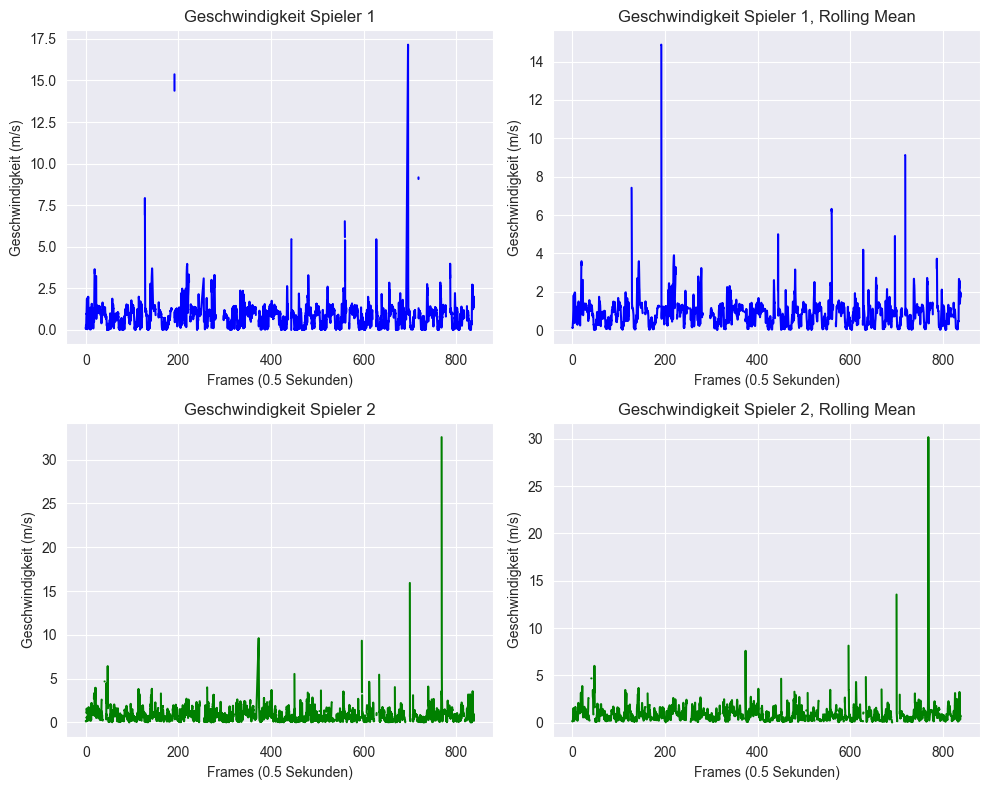

In [9]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

axs[0,0].plot(data['s'], data['geschwindigkeit_p1'], color='blue')
axs[0,0].set_title('Geschwindigkeit Spieler 1')
axs[0,0].set_xlabel('Frames (0.5 Sekunden)')
axs[0,0].set_ylabel('Geschwindigkeit (m/s)')

axs[1,0].plot(data['s'], data['geschwindigkeit_p2'], color='green')
axs[1,0].set_title('Geschwindigkeit Spieler 2')
axs[1,0].set_xlabel('Frames (0.5 Sekunden)')
axs[1,0].set_ylabel('Geschwindigkeit (m/s)')

axs[0,1].plot(data['s'], data['geschwindigkeit_p1_rollingMean'], color='blue')
axs[0,1].set_title('Geschwindigkeit Spieler 1, Rolling Mean')
axs[0,1].set_xlabel('Frames (0.5 Sekunden)')
axs[0,1].set_ylabel('Geschwindigkeit (m/s)')

axs[1,1].plot(data['s'], data['geschwindigkeit_p2_rollingMean'], color='green')
axs[1,1].set_title('Geschwindigkeit Spieler 2, Rolling Mean')
axs[1,1].set_xlabel('Frames (0.5 Sekunden)')
axs[1,1].set_ylabel('Geschwindigkeit (m/s)')

plt.tight_layout()

plt.show()

In [10]:
data["geschwindigkeit_p1_rm_ip"] = data["geschwindigkeit_p1_rollingMean"].interpolate()
data["geschwindigkeit_p2_rm_ip"] = data["geschwindigkeit_p2_rollingMean"].interpolate()
data["geschwindigkeit_p1_ip"] = data["geschwindigkeit_p1"].interpolate()
data["geschwindigkeit_p2_ip"] = data["geschwindigkeit_p2"].interpolate()

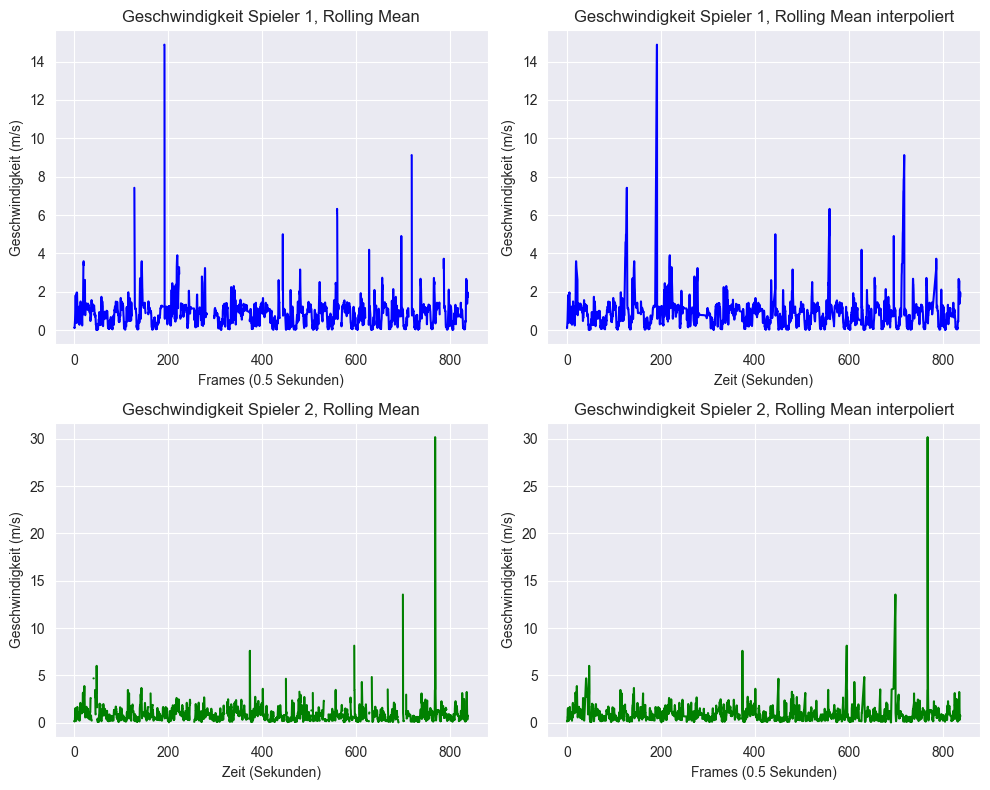

In [11]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
# Zeichnen der Geschwindigkeit für Spieler 1 im ersten Subplot
axs[0,0].plot(data['s'], data['geschwindigkeit_p1_rollingMean'], color='blue')
axs[0,0].set_title('Geschwindigkeit Spieler 1, Rolling Mean')
axs[0,0].set_xlabel('Frames (0.5 Sekunden)')
axs[0,0].set_ylabel('Geschwindigkeit (m/s)')

# Zeichnen der Geschwindigkeit für Spieler 2 im zweiten Subplot
axs[1,0].plot(data['s'], data['geschwindigkeit_p2_rollingMean'], color='green')
axs[1,0].set_title('Geschwindigkeit Spieler 2, Rolling Mean')
axs[1,0].set_xlabel('Zeit (Sekunden)')
axs[1,0].set_ylabel('Geschwindigkeit (m/s)')

# Zeichnen der Geschwindigkeit für Spieler 1 im ersten Subplot
axs[0,1].plot(data['s'], data['geschwindigkeit_p1_rm_ip'], color='blue')
axs[0,1].set_title('Geschwindigkeit Spieler 1, Rolling Mean interpoliert')
axs[0,1].set_xlabel('Zeit (Sekunden)')
axs[0,1].set_ylabel('Geschwindigkeit (m/s)')

# Zeichnen der Geschwindigkeit für Spieler 2 im zweiten Subplot
axs[1,1].plot(data['s'], data['geschwindigkeit_p2_rm_ip'], color='green')
axs[1,1].set_title('Geschwindigkeit Spieler 2, Rolling Mean interpoliert')
axs[1,1].set_xlabel('Frames (0.5 Sekunden)')
axs[1,1].set_ylabel('Geschwindigkeit (m/s)')

# Anpassung des Layouts für eine bessere Darstellung
plt.tight_layout()

# Anzeigen der Diagramme
plt.show()

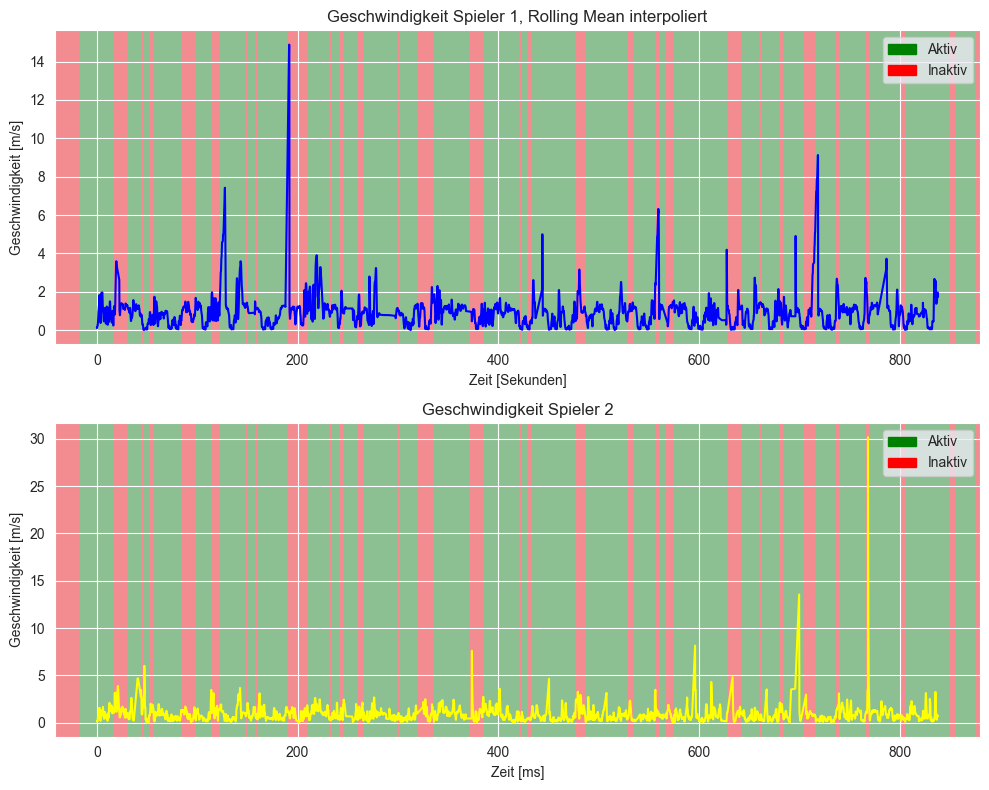

In [12]:

cmap = ListedColormap(['green', 'red'])
# Hinzufügen von benutzerdefinierten Patches für die Legende
aktiver_patch = mpatches.Patch(color='green', label='Aktiv')
inaktiver_patch = mpatches.Patch(color='red', label='Inaktiv')
data['Status_color'] = data['Status'].map({'Aktiv': 1, 'Inaktiv': 0})
fig, axs = plt.subplots(2, 1, figsize=(10, 8))

# Zeichnen der Geschwindigkeit für Spieler 1 im ersten Subplot
axs[0].plot(data['s'], data['geschwindigkeit_p1_rm_ip'], color='blue')
axs[0].pcolorfast(axs[0].get_xlim(), axs[0].get_ylim(),
              data['Status_color'].values[np.newaxis],
              cmap=cmap, alpha=0.4)
axs[0].legend(handles=[aktiver_patch, inaktiver_patch])
axs[0].set_title('Geschwindigkeit Spieler 1, Rolling Mean interpoliert')
axs[0].set_xlabel('Zeit [Sekunden]')
axs[0].set_ylabel('Geschwindigkeit [m/s]')

# Zeichnen der Geschwindigkeit für Spieler 2 im zweiten Subplot
axs[1].plot(data['s'], data['geschwindigkeit_p2_rm_ip'], color='yellow')
axs[1].set_title('Geschwindigkeit Spieler 2')
axs[1].set_xlabel('Zeit [ms]')
axs[1].set_ylabel('Geschwindigkeit [m/s]')
axs[1].pcolorfast(axs[1].get_xlim(), axs[1].get_ylim(),
              data['Status_color'].values[np.newaxis],
              cmap=cmap, alpha=0.4)
axs[1].legend(handles=[aktiver_patch, inaktiver_patch])

# Anpassung des Layouts für eine bessere Darstellung
plt.tight_layout()

# Anzeigen der Diagramme
plt.show()

In [13]:
data_s = data[['geschwindigkeit_p1_rm_ip', 'geschwindigkeit_p2_rm_ip']]
data_s = data_s.resample('500ms').mean()
data_s['s'] = (data_s.index - data_s.index[0]).total_seconds()
data_s.head()


,geschwindigkeit_p1_rm_ip,geschwindigkeit_p2_rm_ip,s
timestamp,,,
1900-01-01 00:00:00.000,0.134154,0.154415,0.0
1900-01-01 00:00:00.500,0.266147,0.204846,0.5
1900-01-01 00:00:01.000,0.510106,0.593052,1.0
1900-01-01 00:00:01.500,0.991251,1.387977,1.5
1900-01-01 00:00:02.000,1.417792,1.532074,2.0


In [14]:
data_s.shape

(1676, 3)

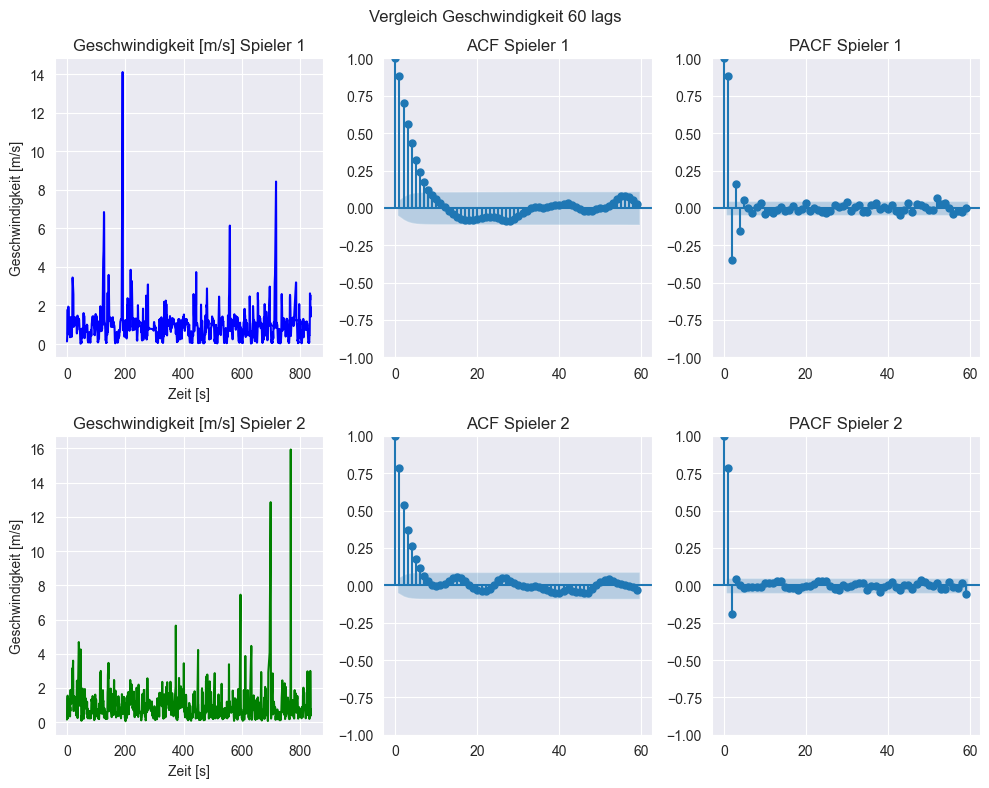

In [15]:

# Geschwindigkeiten von Spieler 1 und Spieler 2


def acfPcafSpieler(df, columns, n_lags, ytext, titel):
    data_c = df.copy()
    data_c_noNAs = data_c.dropna()
    geschwindigkeit_p1 = data_c_noNAs[columns[0]]
    geschwindigkeit_p2 = data_c_noNAs[columns[1]]
    time_s = data_c_noNAs['s']


    fig, axs = plt.subplots(2, 3, figsize=(10, 8))
    # Zeichnen der Geschwindigkeit für Spieler 1 im ersten Subplot
    axs[0,0].plot(time_s, geschwindigkeit_p1, color='blue')
    axs[0,0].set_title(ytext + ' Spieler 1')
    axs[0,0].set_xlabel('Zeit [s]')
    axs[0,0].set_ylabel(ytext)

    # Zeichnen der Geschwindigkeit für Spieler 2 im zweiten Subplot
    axs[1,0].plot(time_s, geschwindigkeit_p2, color='green')
    axs[1,0].set_title(ytext +' Spieler 2')
    axs[1,0].set_xlabel('Zeit [s]')
    axs[1,0].set_ylabel(ytext)

    # Zeichnen der ACF für Spieler 1
    plot_acf(geschwindigkeit_p1, ax=axs[0,1], lags= range(0,n_lags))
    axs[0,1].set_title('ACF Spieler 1')

    # Zeichnen der PACF für Spieler 1
    plot_pacf(geschwindigkeit_p1, ax=axs[0,2],lags=range(0,n_lags) )
    axs[0,2].set_title('PACF Spieler 1')

    # Zeichnen der ACF für Spieler 2
    plot_acf(geschwindigkeit_p2, ax=axs[1,1], lags= range(0,n_lags))
    axs[1,1].set_title('ACF Spieler 2')

    # Zeichnen der PACF für Spieler 2
    plot_pacf(geschwindigkeit_p2, ax=axs[1,2], lags= range(0,n_lags))
    axs[1,2].set_title('PACF Spieler 2')
    plt.suptitle(titel)
    plt.tight_layout()
    plt.show()

acfPcafSpieler(data_s, ['geschwindigkeit_p1_rm_ip','geschwindigkeit_p2_rm_ip'], 60,'Geschwindigkeit [m/s]', 'Vergleich Geschwindigkeit 60 lags' )

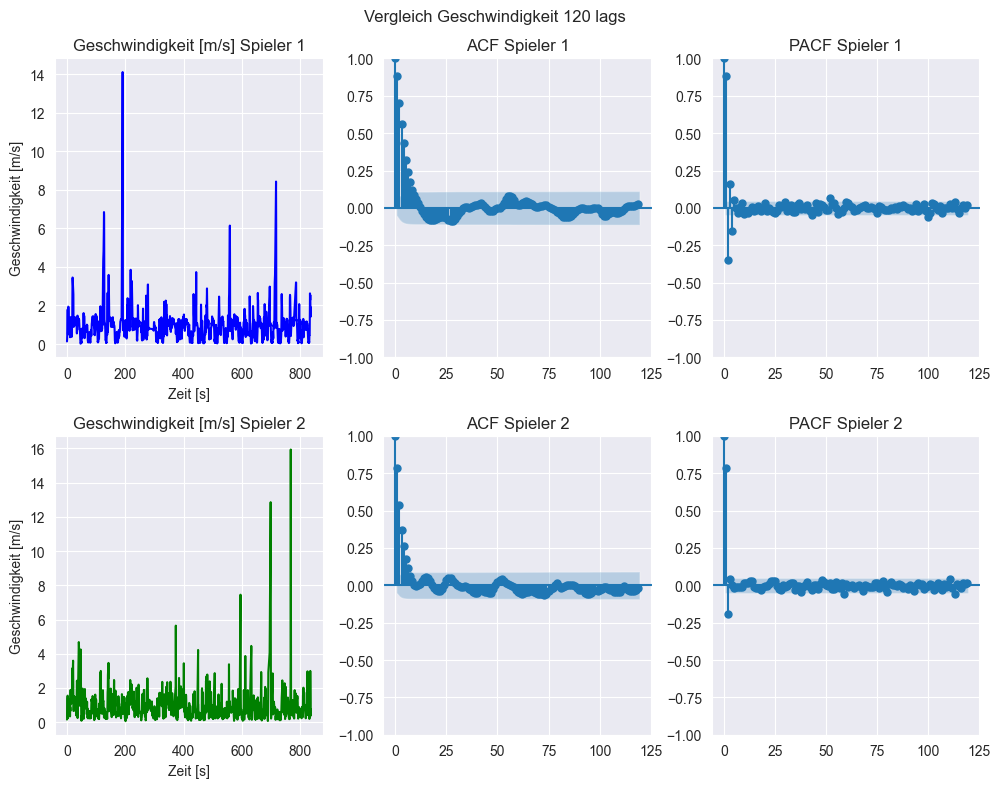

In [16]:
acfPcafSpieler(data_s, ['geschwindigkeit_p1_rm_ip','geschwindigkeit_p2_rm_ip'], 120,'Geschwindigkeit [m/s]', 'Vergleich Geschwindigkeit 120 lags')

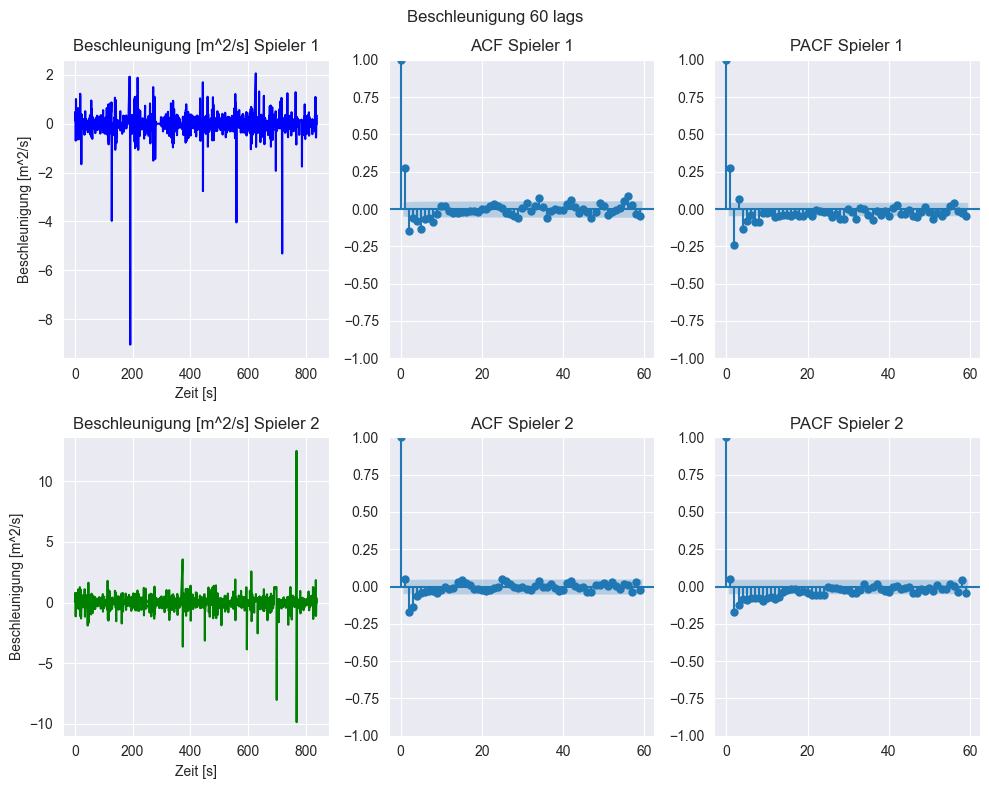

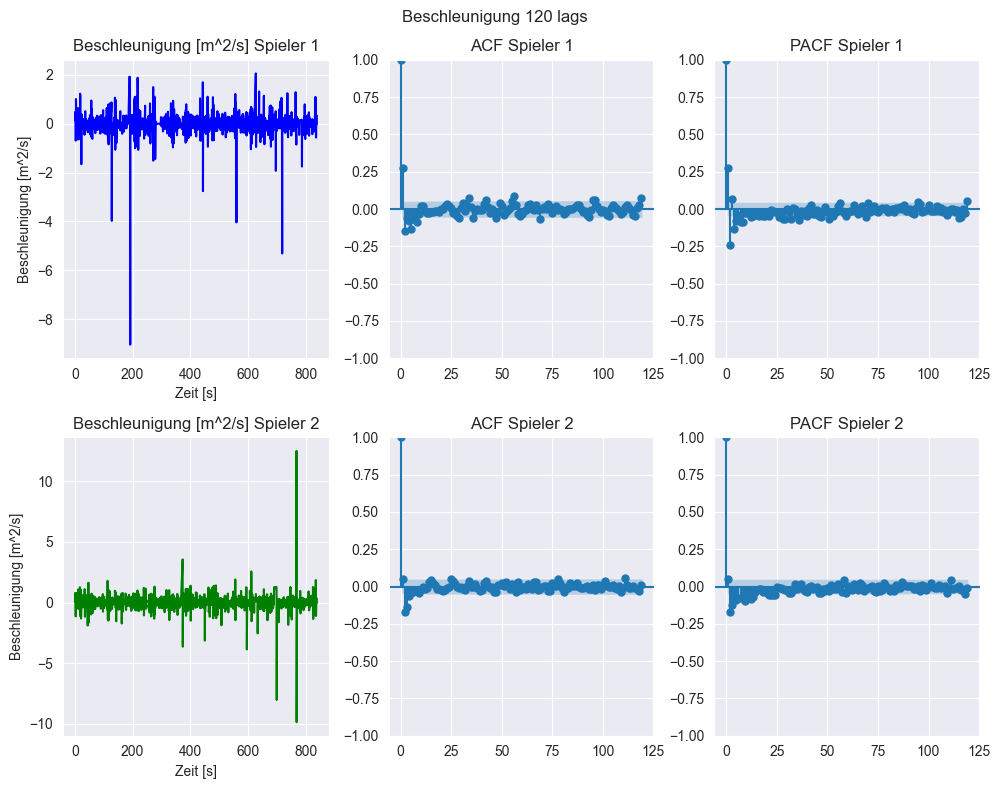

In [17]:
data_s['beschleunigung_p1_rm_ip'] = data_s['geschwindigkeit_p1_rm_ip'].diff()
data_s['beschleunigung_p2_rm_ip'] = data_s['geschwindigkeit_p2_rm_ip'].diff()

acfPcafSpieler(data_s, ['beschleunigung_p1_rm_ip','beschleunigung_p2_rm_ip'], 60,'Beschleunigung [m^2/s]', 'Beschleunigung 60 lags')
acfPcafSpieler(data_s, ['beschleunigung_p1_rm_ip','beschleunigung_p2_rm_ip'], 120,'Beschleunigung [m^2/s]', 'Beschleunigung 120 lags')

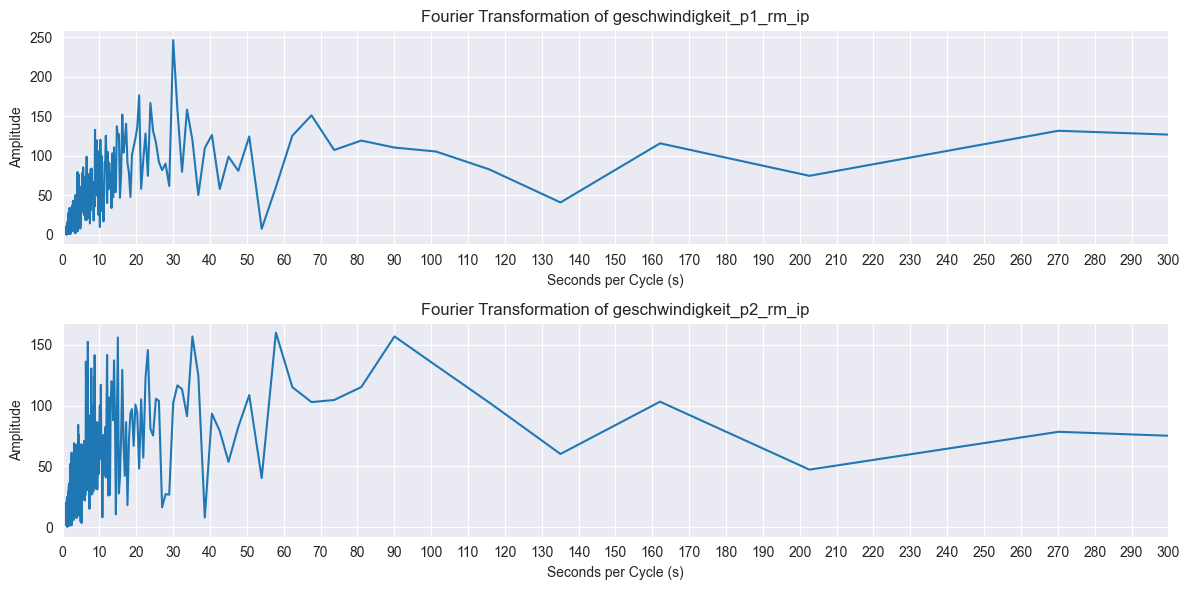

In [29]:
def fourier_analyse(df, column_names, frame_rate):
    if len(column_names) != 2:
        raise ValueError("Bitte genau zwei Spaltennamen angeben.")

    fig, axs = plt.subplots(2, 1, figsize=(12, 6))

    for i, column_name in enumerate(column_names):
        # Remove NAs
        df_fourier = df.dropna(subset=[column_name])

        # Fourier Analysis
        fft_values = np.fft.rfft(df_fourier[column_name])
        amplitudes = np.abs(fft_values)
        freqs = np.fft.rfftfreq(len(df_fourier[column_name]), d=1/frame_rate)

        valid_indices = freqs > 0
        freqs = freqs[valid_indices]
        amplitudes = amplitudes[valid_indices]

        # Plot the Fourier Transform for each column
        axs[i].plot(1/freqs, amplitudes)
        axs[i].set_title(f'Fourier Transformation of {column_name}')
        axs[i].set_xlabel("Seconds per Cycle (s)")
        axs[i].set_ylabel("Amplitude")
        axs[i].set_xlim(0, 300)  # Adjust as needed
        axs[i].set_xticks(range(0,301,10))

    plt.tight_layout()
    plt.show()
fourier_analyse(data_s, ["geschwindigkeit_p1_rm_ip", "geschwindigkeit_p2_rm_ip"], 2)

In [92]:
data_c_noNAs = data_s.dropna()
model_p1 = MSTL(data_c_noNAs["geschwindigkeit_p1_rm_ip"], periods=(20*2,30*2, 60*2),stl_kwargs = {'robust': True})
model_p1 = model_p1.fit()

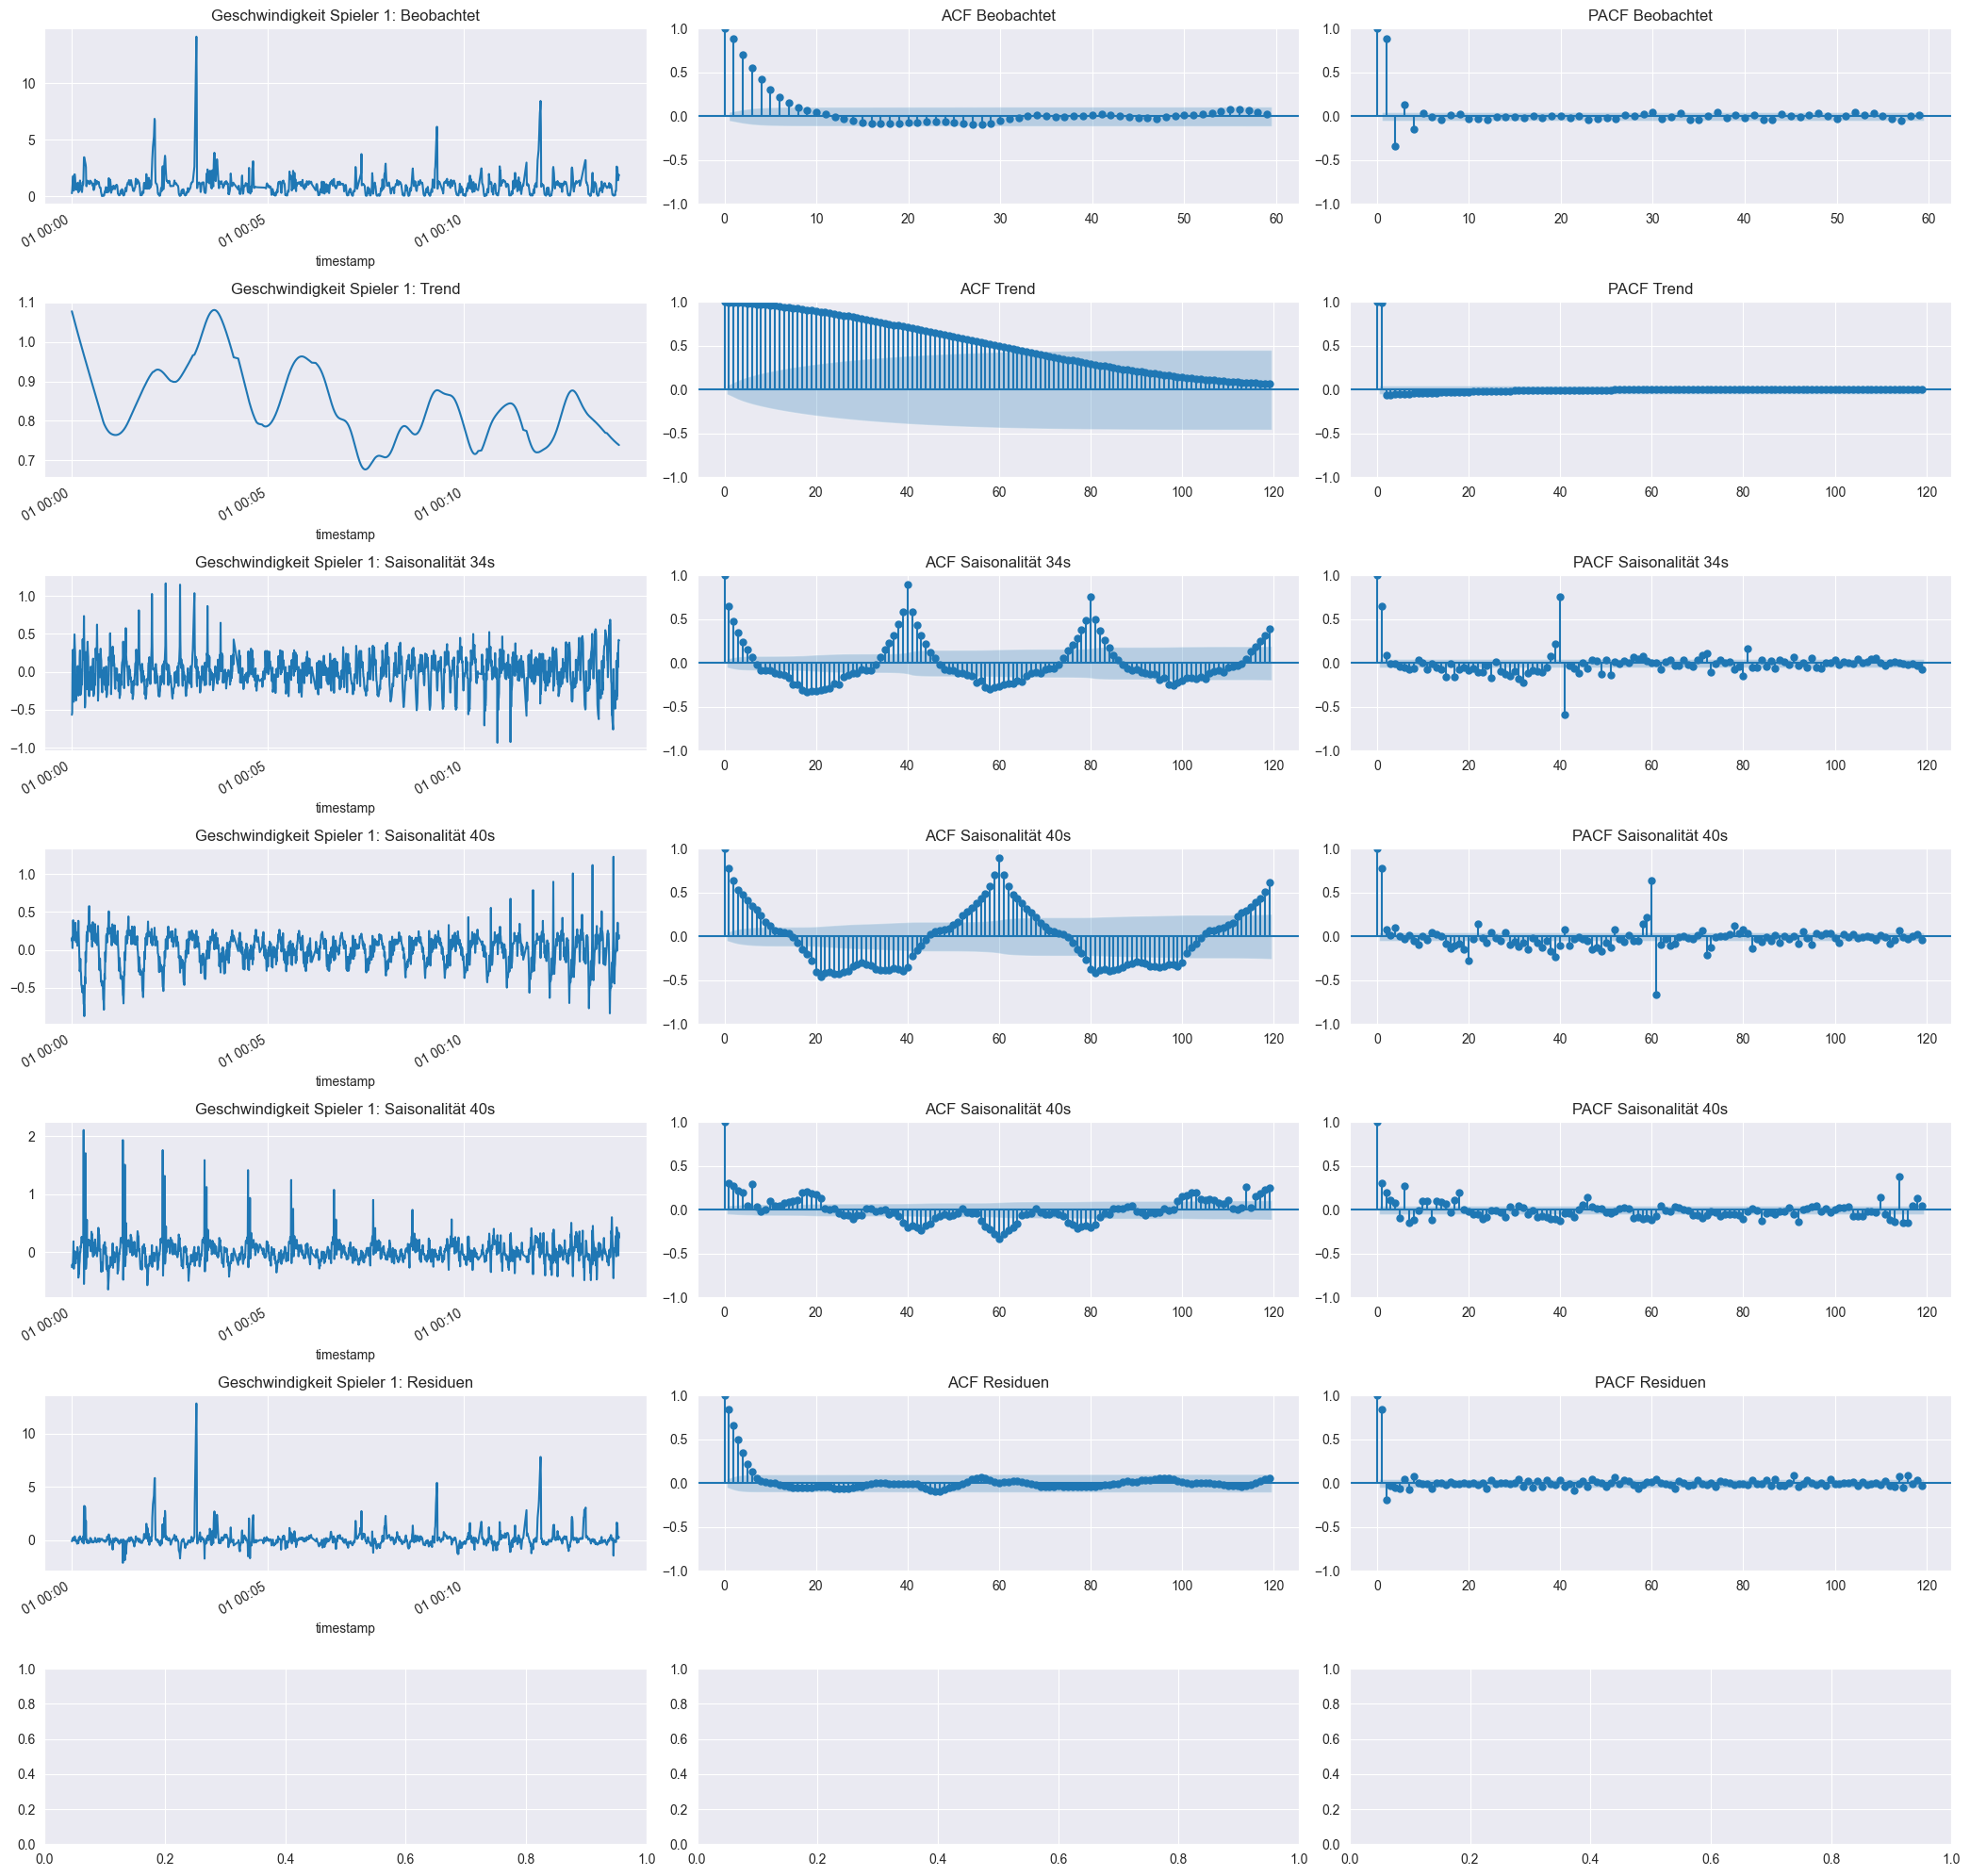

In [93]:
# Plot der Dekompositionsergebnisse und ACF/PACF
fig, axes = plt.subplots(7, 3, figsize=(21, 20))

# Beobachtete Daten
model_p1.observed.plot(ax=axes[0, 0], title="Geschwindigkeit Spieler 1: Beobachtet")
plot_acf(model_p1.observed, ax=axes[0, 1], title="ACF Beobachtet", lags= range(0,60))
plot_pacf(model_p1.observed, ax=axes[0, 2], title="PACF Beobachtet", lags= range(0,60))

# Trend
model_p1.trend.plot(ax=axes[1, 0], title="Geschwindigkeit Spieler 1: Trend")
plot_acf(model_p1.trend, ax=axes[1, 1], title="ACF Trend", lags= range(0,120))
plot_pacf(model_p1.trend, ax=axes[1, 2], title="PACF Trend", lags= range(0,120))

# Saisonale Komponente
model_p1.seasonal["seasonal_40"].plot(ax=axes[2, 0], title="Geschwindigkeit Spieler 1: Saisonalität 34s")
plot_acf(model_p1.seasonal["seasonal_40"], ax=axes[2, 1], title="ACF Saisonalität 34s", lags= range(0,120))
plot_pacf(model_p1.seasonal["seasonal_40"], ax=axes[2, 2], title="PACF Saisonalität 34s", lags= range(0,120))


model_p1.seasonal["seasonal_60"].plot(ax=axes[3, 0], title="Geschwindigkeit Spieler 1: Saisonalität 40s")
plot_acf(model_p1.seasonal["seasonal_60"], ax=axes[3, 1], title="ACF Saisonalität 40s", lags= range(0,120))
plot_pacf(model_p1.seasonal["seasonal_60"], ax=axes[3, 2], title="PACF Saisonalität 40s", lags= range(0,120))

model_p1.seasonal["seasonal_120"].plot(ax=axes[4, 0], title="Geschwindigkeit Spieler 1: Saisonalität 40s")
plot_acf(model_p1.seasonal["seasonal_120"], ax=axes[4, 1], title="ACF Saisonalität 40s", lags= range(0,120))
plot_pacf(model_p1.seasonal["seasonal_120"], ax=axes[4, 2], title="PACF Saisonalität 40s", lags= range(0,120))

model_p1.resid.plot(ax=axes[5, 0], title="Geschwindigkeit Spieler 1: Residuen")
plot_acf(model_p1.resid, ax=axes[5, 1], title="ACF Residuen", lags= range(0,120))
plot_pacf(model_p1.resid, ax=axes[5, 2], title="PACF Residuen", lags= range(0,120))

plt.tight_layout()
plt.show()


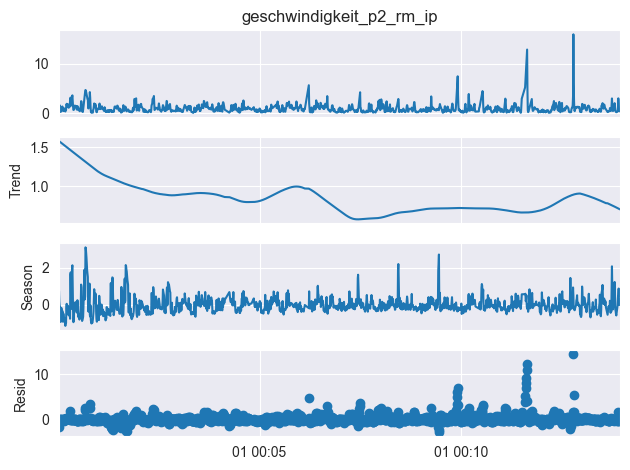

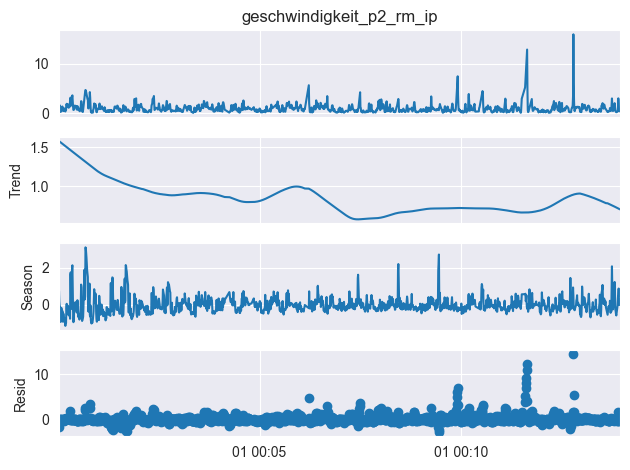

In [96]:
model_p2 = STL(data_c_noNAs["geschwindigkeit_p2_rm_ip"],period=60*2,robust=True).fit()
model_p2.plot()


## Kreuzkorrelation der Zeitreihen

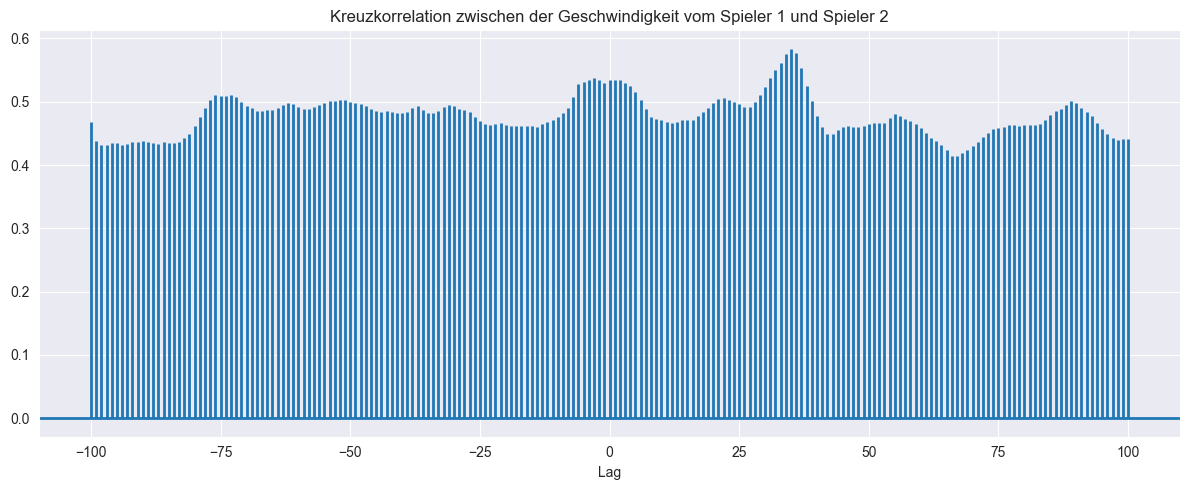

In [37]:
ges_p1 = data_c_noNAs['geschwindigkeit_p1_rm_ip']
ges_p2 = data_c_noNAs['geschwindigkeit_p2_rm_ip']

# Kreuzkorrelation plotten
fig, ax = plt.subplots(figsize=(12, 5))
lags, c, line, b = ax.xcorr(ges_p1, ges_p2, usevlines=True,
                            maxlags=100, normed=True, lw=2)
ax.set_title("Kreuzkorrelation zwischen der Geschwindigkeit vom Spieler 1 und Spieler 2")
ax.set_xlabel("Lag")
ax.grid(True)

plt.tight_layout()
plt.show()

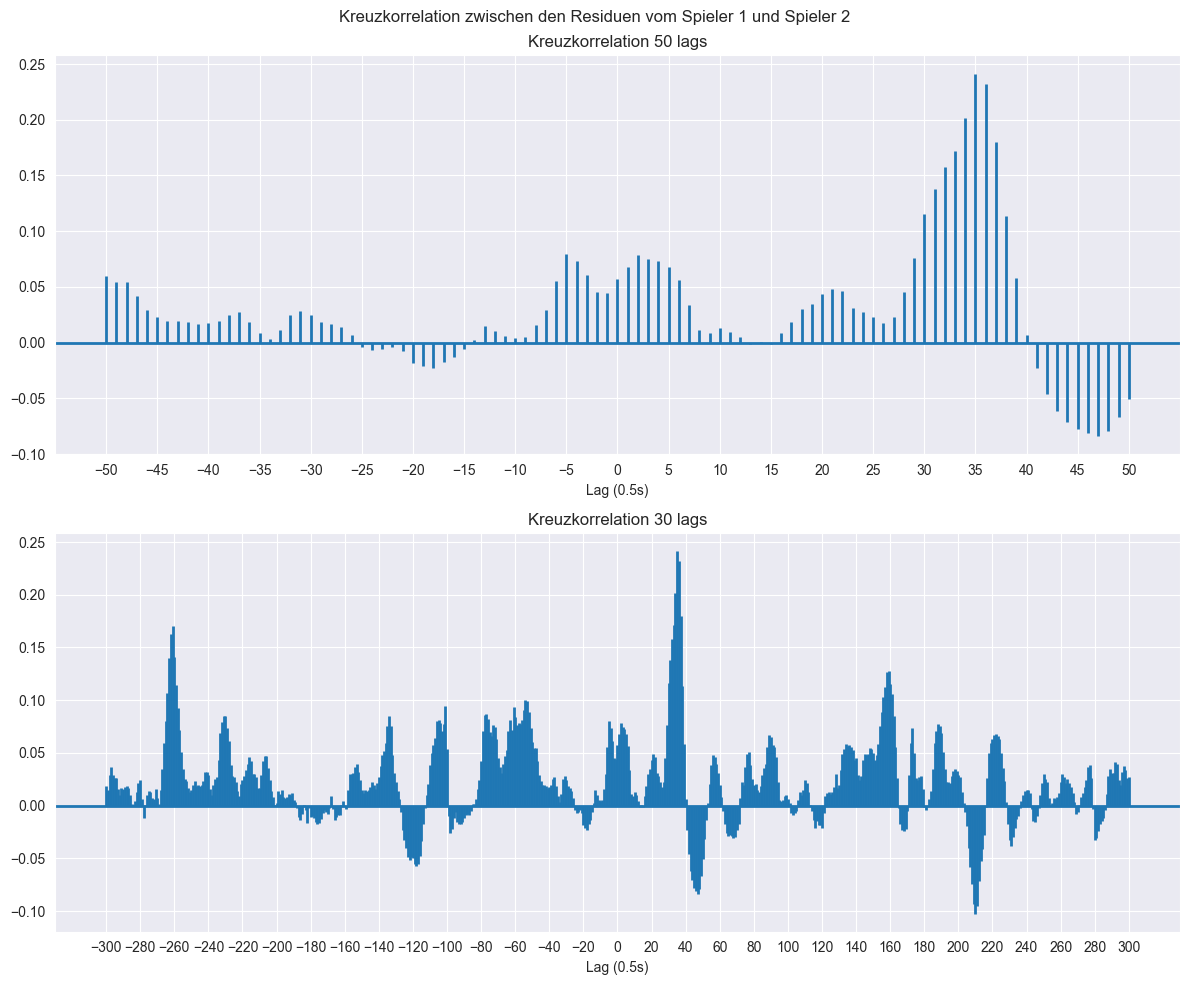

In [42]:
residuen_p1 = model_p1.resid.dropna()
residuen_p2 = model_p2.resid.dropna()

# Kreuzkorrelation plotten
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))  # Adjusted the size to accommodate two subplots.

# Kreuzkorrelation 50 lags
lags_1, c_1, line_1, b_1 = ax1.xcorr(residuen_p1, residuen_p2, usevlines=True,
           maxlags=50, normed=True, lw=2)
ax1.set_title("Kreuzkorrelation 50 lags")
ax1.set_xlabel("Lag (0.5s)")
ax1.set_xticks(range(-50,53,5))
ax1.grid(True)

# Kreuzkorrelation 300 lags
lags_2, c_2, line_2, b_2 = ax2.xcorr( residuen_p1,residuen_p2, usevlines=True,                                     maxlags=300, normed=True, lw=2)
ax2.set_title("Kreuzkorrelation 30 lags")
ax2.set_xlabel("Lag (0.5s)")
ax2.set_xticks(range(-300,301,20))
ax2.grid(True)

plt.suptitle("Kreuzkorrelation zwischen den Residuen vom Spieler 1 und Spieler 2")
plt.tight_layout()
plt.show()

## Hidden Markov Modell

### Daten aufbearbietung

In [43]:
data_hmm = data[['geschwindigkeit_p1_rm_ip','geschwindigkeit_p2_rm_ip', 'new_x_Player1','new_y_Player1','new_z_Player1',
'Schlag Spieler 1','Schlag Spieler 2','s','Status','frame','vx_Player1','vz_Player1']]
data_hmm['ges_xz'] = np.sqrt((data_hmm['vx_Player1']**2) + (data_hmm['vz_Player1']**2))
data_hmm = data_hmm.drop(['vx_Player1','vz_Player1'],axis=1)

schlag_dummies = pd.get_dummies(data_hmm['Schlag Spieler 1'], prefix='P1', dummy_na=True)
data_hmm = pd.concat([data_hmm, schlag_dummies], axis=1)

schlag_dummies = pd.get_dummies(data_hmm['Schlag Spieler 2'],prefix= 'P2')
data_hmm = pd.concat([data_hmm, schlag_dummies], axis=1)
status_dummies = pd.get_dummies(data_hmm['Status'])
data_hmm = pd.concat([data_hmm, status_dummies], axis=1)

bool_columns = data_hmm.select_dtypes(include='bool').columns
data_hmm[bool_columns] = data_hmm[bool_columns].astype(int)
data_hmm.drop(['Schlag Spieler 1', 'Schlag Spieler 2', 'Status', 'P1_nan', 'Aktiv'], axis=1, inplace=True)
data_hmm['p1_besch'] = data_hmm['geschwindigkeit_p1_rm_ip'].diff()
data_hmm['ges_xz'] = np.sqrt((data_hmm['new_x_Player1']**2) + (data_hmm['new_y_Player1']**2))
data_hmm= data_hmm.dropna()

C:\Users\juan-\AppData\Local\Temp\ipykernel_24800\2263560995.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_hmm['ges_xz'] = np.sqrt((data_hmm['vx_Player1']**2) + (data_hmm['vz_Player1']**2))


In [44]:
data_hmm.sort_values('timestamp', inplace=True)

transitions = (data_hmm[['P1_Anschlag', 'P1_Backhand', 'P1_Fronthand', 'P2_Anschlag', 'P2_Backhand', 'P2_Fronthand']] == 1) & (data_hmm[['P1_Anschlag', 'P1_Backhand', 'P1_Fronthand', 'P2_Anschlag', 'P2_Backhand', 'P2_Fronthand']].shift() == 0)

# Berücksichtigung der Spalte 'Inaktiv' nur bei Übergängen von 0 zu 1
inaktiv_transition = (data_hmm['Inaktiv'] == 1) & (data_hmm['Inaktiv'].shift() == 0)

# Erstellen einer booleschen Serie für Change Points
change_points = transitions.any(axis=1) | inaktiv_transition

# Hinzufügen einer Spalte für Sequenznummern
data_hmm['sequence'] = change_points.cumsum()


In [45]:
data_hmm

,geschwindigkeit_p1_rm_ip,geschwindigkeit_p2_rm_ip,new_x_Player1,new_y_Player1,new_z_Player1,s,frame,ges_xz,P1_Anschlag,P1_Backhand,P1_Fronthand,P2_Anschlag,P2_Backhand,P2_Fronthand,Inaktiv,p1_besch,sequence
timestamp,,,,,,,,,,,,,,,,,
1900-01-01 00:00:00.066666,0.116067,0.184936,0.487290,-1.155982,-9.917908,0.066667,289,1.254491,0,0,0,0,0,0,0,-0.022473,0
1900-01-01 00:00:00.100000,0.119389,0.168407,0.482031,-1.156393,-9.918351,0.100000,290,1.252836,0,0,0,0,0,0,0,0.003321,0
1900-01-01 00:00:00.133333,0.116067,0.151878,0.477606,-1.157121,-9.919782,0.133333,291,1.251813,0,0,0,0,0,0,0,-0.003321,0
1900-01-01 00:00:00.166666,0.110637,0.150093,0.473140,-1.159255,-9.922213,0.166667,292,1.252092,0,0,0,0,0,0,0,-0.005431,0
1900-01-01 00:00:00.200000,0.116067,0.148308,0.457745,-1.160795,-9.922712,0.200000,293,1.247788,0,0,0,0,0,0,0,0.005431,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1900-01-01 00:13:57.633333,1.865474,0.706035,1.592413,0.778219,-2.957996,837.633333,25416,1.772401,0,0,0,0,0,0,0,-0.034281,167
1900-01-01 00:13:57.666666,1.838849,0.706035,1.624866,0.777962,-2.949988,837.666667,25417,1.801503,0,0,0,0,0,0,0,-0.026625,167
1900-01-01 00:13:57.700000,1.800638,0.706035,1.657836,0.777459,-2.945402,837.700000,25418,1.831082,0,0,0,0,0,0,0,-0.038212,167


In [46]:
features = ['ges_xz', 'p1_besch',# 'geschwindigkeit_p1_rm_ip',#'geschwindigkeit_p2_rm_ip',
]
data_hmm = data_hmm.dropna()
X = data_hmm[features].values

In [47]:
X2 =  data_hmm['geschwindigkeit_p2_rm_ip'].values.reshape(-1, 1)

In [48]:


model = hmm.GaussianHMM(n_components=3, n_iter=100)

# Trainieren des Modells mit den Daten
model.fit(X)

# Vorhersagen der versteckten Zustände (Cluster)
hidden_states = model.predict(X)

# Hinzufügen der vorhergesagten Zustände zu den originalen Daten
data_hmm['hidden_state'] = hidden_states

# Ergebnisse anzeigen
data_hmm.head()

,geschwindigkeit_p1_rm_ip,geschwindigkeit_p2_rm_ip,new_x_Player1,new_y_Player1,new_z_Player1,s,frame,ges_xz,P1_Anschlag,P1_Backhand,P1_Fronthand,P2_Anschlag,P2_Backhand,P2_Fronthand,Inaktiv,p1_besch,sequence,hidden_state
timestamp,,,,,,,,,,,,,,,,,,
1900-01-01 00:00:00.066666,0.116067,0.184936,0.487290,-1.155982,-9.917908,0.066667,289,1.254491,0,0,0,0,0,0,0,-0.022473,0,0
1900-01-01 00:00:00.100000,0.119389,0.168407,0.482031,-1.156393,-9.918351,0.100000,290,1.252836,0,0,0,0,0,0,0,0.003321,0,0
1900-01-01 00:00:00.133333,0.116067,0.151878,0.477606,-1.157121,-9.919782,0.133333,291,1.251813,0,0,0,0,0,0,0,-0.003321,0,0
1900-01-01 00:00:00.166666,0.110637,0.150093,0.473140,-1.159255,-9.922213,0.166667,292,1.252092,0,0,0,0,0,0,0,-0.005431,0,0
1900-01-01 00:00:00.200000,0.116067,0.148308,0.457745,-1.160795,-9.922712,0.200000,293,1.247788,0,0,0,0,0,0,0,0.005431,0,0


In [49]:
data_hmm[['geschwindigkeit_p1_rm_ip','frame','hidden_state']].sort_values(by = 'frame')

,geschwindigkeit_p1_rm_ip,frame,hidden_state
timestamp,,,
1900-01-01 00:00:00.066666,0.116067,289,0
1900-01-01 00:00:00.100000,0.119389,290,0
1900-01-01 00:00:00.133333,0.116067,291,0
1900-01-01 00:00:00.166666,0.110637,292,0
1900-01-01 00:00:00.200000,0.116067,293,0
...,...,...,...
1900-01-01 00:13:57.633333,1.865474,25416,0
1900-01-01 00:13:57.666666,1.838849,25417,0
1900-01-01 00:13:57.700000,1.800638,25418,0


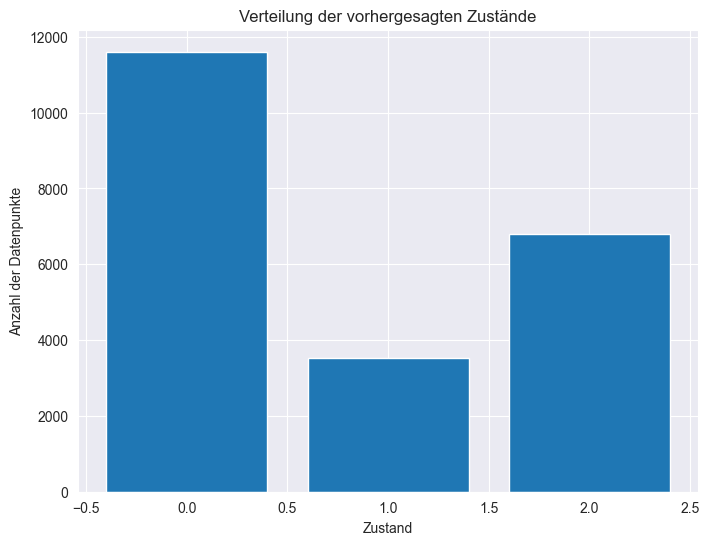

In [50]:
state_counts = data_hmm['hidden_state'].value_counts()

# Barplot erstellen
plt.figure(figsize=(8, 6))
plt.bar(state_counts.index, state_counts.values)
plt.xlabel('Zustand')
plt.ylabel('Anzahl der Datenpunkte')
plt.title('Verteilung der vorhergesagten Zustände')
plt.show()

In [52]:
data_hmm

,geschwindigkeit_p1_rm_ip,geschwindigkeit_p2_rm_ip,new_x_Player1,new_y_Player1,new_z_Player1,s,frame,ges_xz,P1_Anschlag,P1_Backhand,P1_Fronthand,P2_Anschlag,P2_Backhand,P2_Fronthand,Inaktiv,p1_besch,sequence,hidden_state
timestamp,,,,,,,,,,,,,,,,,,
1900-01-01 00:00:00.066666,0.116067,0.184936,0.487290,-1.155982,-9.917908,0.066667,289,1.254491,0,0,0,0,0,0,0,-0.022473,0,0
1900-01-01 00:00:00.100000,0.119389,0.168407,0.482031,-1.156393,-9.918351,0.100000,290,1.252836,0,0,0,0,0,0,0,0.003321,0,0
1900-01-01 00:00:00.133333,0.116067,0.151878,0.477606,-1.157121,-9.919782,0.133333,291,1.251813,0,0,0,0,0,0,0,-0.003321,0,0
1900-01-01 00:00:00.166666,0.110637,0.150093,0.473140,-1.159255,-9.922213,0.166667,292,1.252092,0,0,0,0,0,0,0,-0.005431,0,0
1900-01-01 00:00:00.200000,0.116067,0.148308,0.457745,-1.160795,-9.922712,0.200000,293,1.247788,0,0,0,0,0,0,0,0.005431,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1900-01-01 00:13:57.633333,1.865474,0.706035,1.592413,0.778219,-2.957996,837.633333,25416,1.772401,0,0,0,0,0,0,0,-0.034281,167,0
1900-01-01 00:13:57.666666,1.838849,0.706035,1.624866,0.777962,-2.949988,837.666667,25417,1.801503,0,0,0,0,0,0,0,-0.026625,167,0
1900-01-01 00:13:57.700000,1.800638,0.706035,1.657836,0.777459,-2.945402,837.700000,25418,1.831082,0,0,0,0,0,0,0,-0.038212,167,0


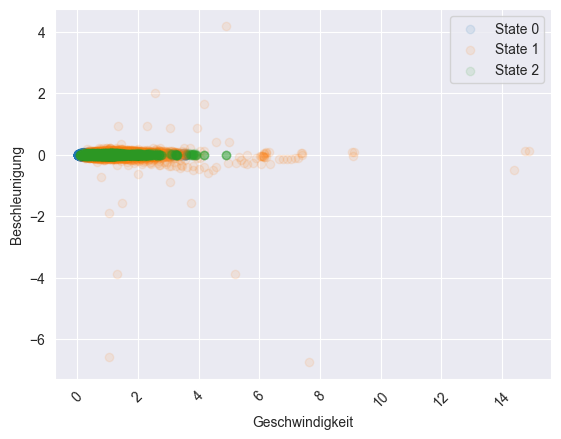

In [117]:
# Separate data based on 'hidden_state'
unique_states = data_hmm['hidden_state'].unique()
for state in unique_states:
    subset = data_hmm[data_hmm['hidden_state'] == state]
    plt.scatter(subset['geschwindigkeit_p1_rm_ip'],subset['p1_besch'],  label=f'State {state}', alpha= 0.1)

plt.xlabel('Geschwindigkeit')
plt.ylabel('Beschleunigung')
plt.legend()
plt.xticks(rotation=45)  # Rotate date labels for better readability
plt.show()


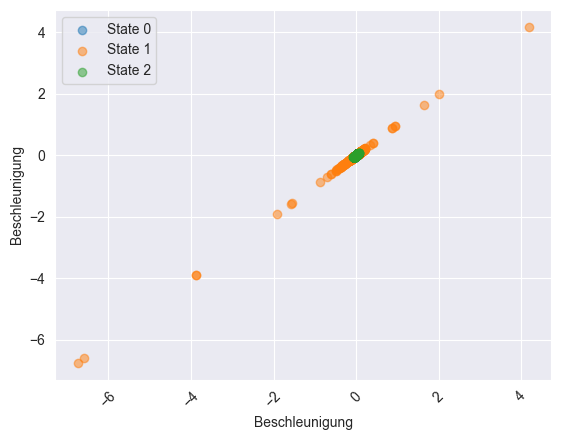

In [119]:
unique_states = data_hmm['hidden_state'].unique()
for state in unique_states:
    subset = data_hmm[data_hmm['hidden_state'] == state]
    plt.scatter(subset['p1_besch'], subset['p1_besch'], label=f'State {state}',alpha= 0.5)

plt.xlabel('Beschleunigung')
plt.ylabel('Beschleunigung')
plt.legend()
plt.xticks(rotation=45)  # Rotate date labels for better readability
plt.show()

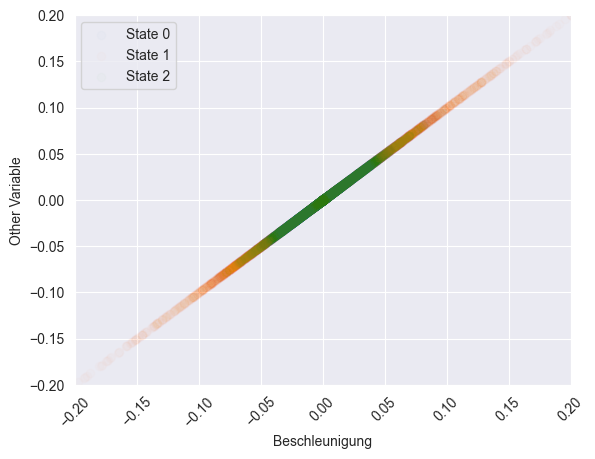

In [116]:
for state in unique_states:
    subset = data_hmm[data_hmm['hidden_state'] == state]
    plt.scatter(subset['p1_besch'], subset['p1_besch'], label=f'State {state}', alpha= 0.01)  # Replace 'other_variable' as needed

plt.xlabel('Beschleunigung')
plt.ylabel('Other Variable')  # Replace with the actual y-axis label
plt.xlim(-0.2, 0.2)  # Set x-axis limits
plt.ylim(-0.2, 0.2)  # Set y-axis limits, adjust as needed
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [54]:
state_dummies = pd.get_dummies(data_hmm['hidden_state'],prefix= 'State', dtype= int)
data_hmm = pd.concat([data_hmm, state_dummies], axis=1)


In [55]:
data_hmm.head(1000)

,geschwindigkeit_p1_rm_ip,geschwindigkeit_p2_rm_ip,new_x_Player1,new_y_Player1,new_z_Player1,s,frame,ges_xz,P1_Anschlag,P1_Backhand,...,P2_Anschlag,P2_Backhand,P2_Fronthand,Inaktiv,p1_besch,sequence,hidden_state,State_0,State_1,State_2
timestamp,,,,,,,,,,,,,,,,,,,,,
1900-01-01 00:00:00.066666,0.116067,0.184936,0.487290,-1.155982,-9.917908,0.066667,289,1.254491,0,0,...,0,0,0,0,-0.022473,0,0,1,0,0
1900-01-01 00:00:00.100000,0.119389,0.168407,0.482031,-1.156393,-9.918351,0.100000,290,1.252836,0,0,...,0,0,0,0,0.003321,0,0,1,0,0
1900-01-01 00:00:00.133333,0.116067,0.151878,0.477606,-1.157121,-9.919782,0.133333,291,1.251813,0,0,...,0,0,0,0,-0.003321,0,0,1,0,0
1900-01-01 00:00:00.166666,0.110637,0.150093,0.473140,-1.159255,-9.922213,0.166667,292,1.252092,0,0,...,0,0,0,0,-0.005431,0,0,1,0,0
1900-01-01 00:00:00.200000,0.116067,0.148308,0.457745,-1.160795,-9.922712,0.200000,293,1.247788,0,0,...,0,0,0,0,0.005431,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1900-01-01 00:00:36.233333,1.562294,0.289700,-2.816826,1.090867,-3.330857,36.233333,1374,3.020678,0,0,...,0,0,0,1,0.019392,13,2,0,0,1
1900-01-01 00:00:36.266666,1.570647,0.284307,-2.803276,1.074410,-3.386214,36.266667,1375,3.002118,0,0,...,0,0,0,1,0.008353,13,2,0,0,1
1900-01-01 00:00:36.300000,1.570647,0.277800,-2.791576,1.060071,-3.431187,36.300000,1376,2.986075,0,0,...,0,0,0,1,0.000000,13,2,0,0,1


In [56]:
from sklearn.metrics import f1_score, accuracy_score

f1_scores = {}
accuracy_scores = {}
for i in range(0,max(hidden_states)+1):
    actual = data_hmm["Inaktiv"]
    predicted = data_hmm[f"State_{i}"]
    score_f1 = f1_score(actual, predicted)
    score_accuracy = accuracy_score(actual, predicted)
    f1_scores[i] = score_f1  # Assigning F1 score correctly
    accuracy_scores[i] = score_accuracy  # Assigning accuracy score correctly

# Print the calculated scores
print("F1 Scores:", f1_scores)
print("Accuracy Scores:", accuracy_scores)

F1 Scores: {0: 0.6748274144189026, 1: 0.17120894479385046, 2: 0.4549396762698038}
Accuracy Scores: {0: 0.5835384194695106, 1: 0.24327773220308085, 2: 0.4214292224956704}


In [57]:

f1_scores_a = {}
accuracy_scores_a = {}
for i in range(0,3):
    actual = data_hmm["P1_Anschlag"]
    predicted = data_hmm[f"State_{i}"]
    score_f1 = f1_score(actual, predicted)
    score_accuracy = accuracy_score(actual, predicted)
    f1_scores_a[i] = score_f1  # Assigning F1 score correctly
    accuracy_scores_a[i] = score_accuracy  # Assigning accuracy score correctly

# Print the calculated scores
print("F1 Scores:", f1_scores_a)
print("Accuracy Scores:", accuracy_scores_a)

F1 Scores: {0: 0.0046415678184631255, 1: 0.0, 2: 0.0}
Accuracy Scores: {0: 0.4722450095706864, 1: 0.8374806307538055, 2: 0.689043842858445}


In [60]:
import numpy as np

mean_inaktiv = np.mean(data_hmm['Inaktiv'])
std_inaktiv = np.std(data_hmm['Inaktiv'])

mean_hidden = np.mean(data_hmm['hidden_state'])
std_hidden = np.std(data_hmm['hidden_state'])

print(f'Mittelwert Inaktiv: {mean_inaktiv}, Standardabweichung Inaktiv: {std_inaktiv}')
print(f'Mittelwert Hidden State: {mean_hidden}, Standardabweichung Hidden State: {std_hidden}')


Mittelwert Inaktiv: 0.7517546258317382, Standardabweichung Inaktiv: 0.4319949170676913
Mittelwert Hidden State: 0.7807401330781151, Standardabweichung Hidden State: 0.8891772929670809


## Sequentierung der Daten

In [63]:


data_hmm[['P1_Anschlag', 'P1_Backhand', 'P1_Fronthand', 'P2_Anschlag', 'P2_Backhand', 'P2_Fronthand','sequence']]

,P1_Anschlag,P1_Backhand,P1_Fronthand,P2_Anschlag,P2_Backhand,P2_Fronthand,sequence
timestamp,,,,,,,
1900-01-01 00:00:00.066666,0,0,0,0,0,0,0
1900-01-01 00:00:00.100000,0,0,0,0,0,0,0
1900-01-01 00:00:00.133333,0,0,0,0,0,0,0
1900-01-01 00:00:00.166666,0,0,0,0,0,0,0
1900-01-01 00:00:00.200000,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...
1900-01-01 00:13:57.633333,0,0,0,0,0,0,167
1900-01-01 00:13:57.666666,0,0,0,0,0,0,167
1900-01-01 00:13:57.700000,0,0,0,0,0,0,167


In [127]:
sequences = data_hmm['sequence'].unique()

sequence_matrices = []

for seq in sequences:
    seq_data = data_hmm[data_hmm['sequence'] == seq]
    seq_matrix = seq_data[['geschwindigkeit_p1_rm_ip']].values
    sequence_matrices.append(seq_matrix)

In [ ]:
from fastdtw import fastdtw
from scipy.spatial.distance import euclidean
from tqdm import tqdm

num_sequences = len(sequence_matrices)
dtw_distances = np.zeros((num_sequences, num_sequences))

# Verwenden von tqdm in der äußeren Schleife
for i in tqdm(range(num_sequences), desc="Berechnung der DTW-Distanzen"):
    for j in range(i+1, num_sequences):
        distance, _ = fastdtw(sequence_matrices[i], sequence_matrices[j], dist=euclidean)
        dtw_distances[i, j] = distance
        dtw_distances[j, i] = distance


Berechnung der DTW-Distanzen:  78%|███████▊  | 132/169 [05:13<00:30,  1.21it/s]

In [125]:
from sklearn.cluster import KMeans

# Anwenden von K-Means auf die Distanzmatrix
kmeans = KMeans(n_clusters=5)
clusters = kmeans.fit_predict(dtw_distances)

# Zuordnung der Cluster-Labels zu den ursprünglichen Daten
for i, seq in enumerate(sequences):
    data_hmm.loc[data_hmm['sequence'] == seq, 'cluster'] = clusters[i]


In [126]:
data_hmm

,geschwindigkeit_p1_rm_ip,geschwindigkeit_p2_rm_ip,new_x_Player1,new_y_Player1,new_z_Player1,s,frame,ges_xz,P1_Anschlag,P1_Backhand,...,P2_Backhand,P2_Fronthand,Inaktiv,p1_besch,sequence,hidden_state,State_0,State_1,State_2,cluster
timestamp,,,,,,,,,,,,,,,,,,,,,
1900-01-01 00:00:00.066666,0.116067,0.184936,0.487290,-1.155982,-9.917908,0.066667,289,1.254491,0,0,...,0,0,0,-0.022473,0,0,1,0,0,4.0
1900-01-01 00:00:00.100000,0.119389,0.168407,0.482031,-1.156393,-9.918351,0.100000,290,1.252836,0,0,...,0,0,0,0.003321,0,0,1,0,0,4.0
1900-01-01 00:00:00.133333,0.116067,0.151878,0.477606,-1.157121,-9.919782,0.133333,291,1.251813,0,0,...,0,0,0,-0.003321,0,0,1,0,0,4.0
1900-01-01 00:00:00.166666,0.110637,0.150093,0.473140,-1.159255,-9.922213,0.166667,292,1.252092,0,0,...,0,0,0,-0.005431,0,0,1,0,0,4.0
1900-01-01 00:00:00.200000,0.116067,0.148308,0.457745,-1.160795,-9.922712,0.200000,293,1.247788,0,0,...,0,0,0,0.005431,0,0,1,0,0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1900-01-01 00:13:57.633333,1.865474,0.706035,1.592413,0.778219,-2.957996,837.633333,25416,1.772401,0,0,...,0,0,0,-0.034281,167,0,1,0,0,4.0
1900-01-01 00:13:57.666666,1.838849,0.706035,1.624866,0.777962,-2.949988,837.666667,25417,1.801503,0,0,...,0,0,0,-0.026625,167,0,1,0,0,4.0
1900-01-01 00:13:57.700000,1.800638,0.706035,1.657836,0.777459,-2.945402,837.700000,25418,1.831082,0,0,...,0,0,0,-0.038212,167,0,1,0,0,4.0


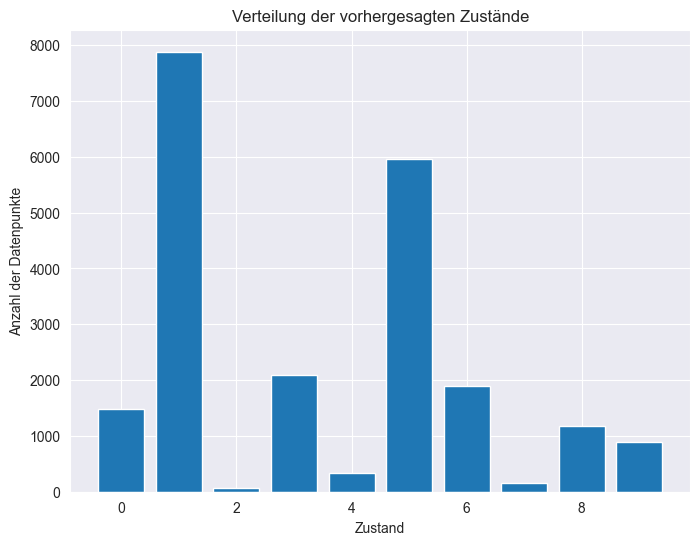

In [77]:
state_counts = data_hmm['cluster'].value_counts()

# Barplot erstellen
plt.figure(figsize=(8, 6))
plt.bar(state_counts.index, state_counts.values)
plt.xlabel('Zustand')
plt.ylabel('Anzahl der Datenpunkte')
plt.title('Verteilung der vorhergesagten Zustände')
plt.show()

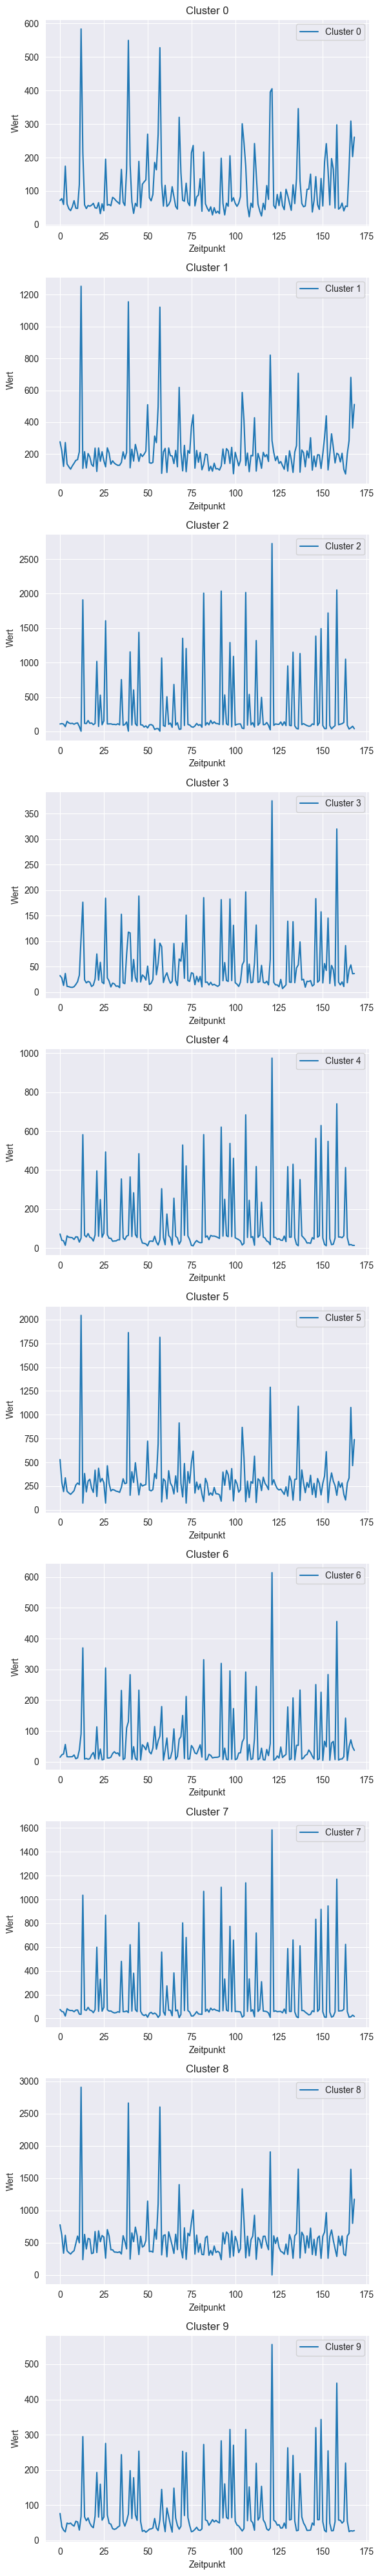

In [120]:
# Anzahl der Cluster

cluster_centers = kmeans.cluster_centers_
n_clusters = len(cluster_centers)

# Erstellen von Subplots
fig, axs = plt.subplots(n_clusters, 1, figsize=(6, n_clusters * 4))

# Überprüfen, ob es nur ein Cluster gibt
if n_clusters == 1:
    axs = [axs]

# Visualisieren der Clusterzentren als typische Verläufe
for i, center in enumerate(cluster_centers):
    axs[i].plot(center, label=f'Cluster {i}')
    axs[i].set_title(f'Cluster {i}')
    axs[i].set_xlabel('Zeitpunkt')
    axs[i].set_ylabel('Wert')
    axs[i].legend()

plt.tight_layout()
plt.show()

In [121]:
state_dummies = pd.get_dummies(data_hmm['cluster'],prefix= 'cluster', dtype= int)
data_hmm = pd.concat([data_hmm, state_dummies], axis=1)

In [122]:
cross_table0 = pd.crosstab(data_hmm["Inaktiv"],data_hmm["cluster_0.0"])
cross_table1 = pd.crosstab(data_hmm["Inaktiv"],data_hmm["cluster_1.0"])
cross_table2 = pd.crosstab(data_hmm["Inaktiv"],data_hmm["cluster_2.0"])
cross_table3 = pd.crosstab(data_hmm["Inaktiv"],data_hmm["cluster_3.0"])
cross_table4 = pd.crosstab(data_hmm["Inaktiv"],data_hmm["cluster_4.0"])


# Die Kreuztabelle anzeigen
print(cross_table0)
print(cross_table1)
print(cross_table2)
print(cross_table3)
print(cross_table4)


ValueError: Data must be 1-dimensional, got ndarray of shape (21942, 2) instead

In [123]:
data_hmm.drop(list(data_hmm.filter(regex = 'cluster_')), axis = 1, inplace = True)

In [124]:
data_hmm

,geschwindigkeit_p1_rm_ip,geschwindigkeit_p2_rm_ip,new_x_Player1,new_y_Player1,new_z_Player1,s,frame,ges_xz,P1_Anschlag,P1_Backhand,...,P2_Backhand,P2_Fronthand,Inaktiv,p1_besch,sequence,hidden_state,State_0,State_1,State_2,cluster
timestamp,,,,,,,,,,,,,,,,,,,,,
1900-01-01 00:00:00.066666,0.116067,0.184936,0.487290,-1.155982,-9.917908,0.066667,289,1.254491,0,0,...,0,0,0,-0.022473,0,0,1,0,0,6.0
1900-01-01 00:00:00.100000,0.119389,0.168407,0.482031,-1.156393,-9.918351,0.100000,290,1.252836,0,0,...,0,0,0,0.003321,0,0,1,0,0,6.0
1900-01-01 00:00:00.133333,0.116067,0.151878,0.477606,-1.157121,-9.919782,0.133333,291,1.251813,0,0,...,0,0,0,-0.003321,0,0,1,0,0,6.0
1900-01-01 00:00:00.166666,0.110637,0.150093,0.473140,-1.159255,-9.922213,0.166667,292,1.252092,0,0,...,0,0,0,-0.005431,0,0,1,0,0,6.0
1900-01-01 00:00:00.200000,0.116067,0.148308,0.457745,-1.160795,-9.922712,0.200000,293,1.247788,0,0,...,0,0,0,0.005431,0,0,1,0,0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1900-01-01 00:13:57.633333,1.865474,0.706035,1.592413,0.778219,-2.957996,837.633333,25416,1.772401,0,0,...,0,0,0,-0.034281,167,0,1,0,0,4.0
1900-01-01 00:13:57.666666,1.838849,0.706035,1.624866,0.777962,-2.949988,837.666667,25417,1.801503,0,0,...,0,0,0,-0.026625,167,0,1,0,0,4.0
1900-01-01 00:13:57.700000,1.800638,0.706035,1.657836,0.777459,-2.945402,837.700000,25418,1.831082,0,0,...,0,0,0,-0.038212,167,0,1,0,0,4.0


In [88]:
from sklearn.metrics import f1_score, accuracy_score

# Berechnung der F1-Scores für jede Kreuztabelle
f1_scores = {}
for i in range(5):
    actual = data_hmm["Inaktiv"]
    predicted = data_hmm[f"cluster_{i}.0"]
    score = f1_score(actual, predicted)
    f1_scores[i] = score

f1_scores

{0: 0.16436679278878255,
 1: 0.6467861684236433,
 2: 0.0,
 3: 0.0,
 4: 0.00011877189856879862}

In [89]:
accuracy_scores = {}
for i in range(5):
    actual = data_hmm["Inaktiv"]
    predicted = data_hmm[f"cluster_{i}.0"]
    score = accuracy_score(actual, predicted)
    accuracy_scores[i] = score

accuracy_scores

{0: 0.31555920153130984,
 1: 0.6075562847507064,
 2: 0.24500957068635493,
 3: 0.15294868289125876,
 4: 0.23265882781879502}